# MZI layout example
This example uses Jupyter Notebook as an environment.

# Generate MZI layout

* Import function packages

    Run the code cell and it will tell you the version of the ``fnpcell`` and ``gpdk``.

In [20]:
import fnpcell.all as fp
from gpdk import all as pdk
from gpdk.technology import get_technology

* Parameter setting

In [21]:
L_FSR_coeff: float = 1
L_shift_coeff: float = 0
FSR: float = 10  # nm
lambda_center: float = 1550  # nm
neff: float = 2.4
ng: float = 4.0

In [22]:
FSR = FSR * 1e-9
lambda_center = lambda_center * 1e-9
neff = neff
ng = ng
L_FSR_coeff = L_FSR_coeff
L_shift_coeff = L_shift_coeff
base_length = 50  # um
delta_L_base = (lambda_center**2 / 2 / FSR / ng) * 1e6
delta_L_FS = (lambda_center / neff) * 1e6
delta_L_FSR = delta_L_base / L_FSR_coeff
delta_L_shift = delta_L_FS * L_shift_coeff
delta_L = delta_L_FSR + delta_L_shift


* Place ``DC_050`` components in MZI

    Create ``Instanceset``, ``Elementset``, ``Portset`` for components and ports to add in the ``Device`` function in ``fnpcell``. Then call two ``DC_050`` in ``pdk`` naming ``DC1`` and ``DC2``, translating their locations and instantiating to ``insts``. 

In [23]:
insts, elems, ports = fp.InstanceSet(), fp.ElementSet(), fp.PortSet()
TECH = get_technology()

DC_050 = pdk.DC_050()

DC1 = DC_050.translated(-60, 0)
insts += DC1, "DC1"
DC2 = DC_050.translated(0, 0)
insts += DC2, "DC2"

* Create links and ports to connect ``DC_050`` in MZI

    The scripts here to generate links( ``fp.create_links`` ) and ports are the same when using Python IDE environment. However, in the end we have to create a cell reference which contains the ``instanceset``, ``elementset``, and ``portset`` we generated above.

In [24]:
links = fp.create_links(
    link_type=TECH.WG.FWG.C.WIRE,
    bend_factory=TECH.WG.FWG.C.WIRE.BEND_CIRCULAR,
    specs=[
        fp.LinkBetween(
            DC1["op_2"],
            DC2["op_1"],
            target_length=base_length,
        ),
        fp.LinkBetween(
            DC1["op_3"],
            DC2["op_0"],
            target_length=base_length + delta_L
        ),
    ],
)
insts += links

ports += DC1["op_0"].with_name("op_1")
ports += DC1["op_1"].with_name("op_2")
ports += DC2["op_2"].with_name("op_3")
ports += DC2["op_3"].with_name("op_4")



export_gds: C:\LDA\layout1001\local\mzi_jupyter_notebook.gds


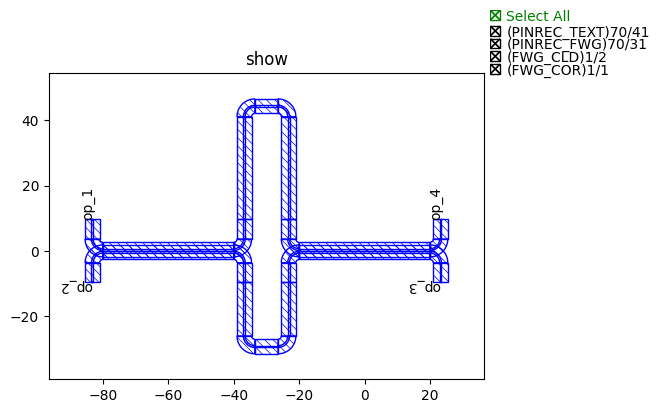

In [25]:
gds_file = "C:\\LDA\\layout1001\\local\\mzi_jupyter_notebook.gds"
library = fp.Library()
TECH = get_technology()
device = fp.Device(content=[insts], ports=ports)
library += device
fp.export_gds(library, file=gds_file)
fp.plot(library)
